In [1]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import data_fcts as df

In [2]:
exp_folder = "/media/leni/DATADRIVE1/are-logs/meim/"


In [9]:
parent_fits = []
for folder in os.listdir(exp_folder):
    print(folder)
    parent_ids = df.load_parent_pool(exp_folder + "/" + folder + "/parents_pool.csv")
    ids, parents, fitnesses, evals, deltas = df.load_fitness(exp_folder + "/" + folder + "/fitness.csv")
    fits = [[i,p[0],p[1],f,folder] for i, p, f in zip(ids,parents,fitnesses)]
    parent_fits += df.filter_to_parent_pool(fits,parent_ids)
par_fit_data = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","parent 1","parent 2","fitness","replicate"])



meim_16_3_16-56-39-9868-18373300
meim_16_3_16-56-42-2870-2796053236
meim_16_3_16-56-45-5895-1777546940
meim_16_3_16-56-45-5917-957574002
meim_16_3_16-56-48-8931-985534567
meim_16_3_16-56-48-8936-2561894498
meim_16_3_16-56-51-1885-639115363
meim_16_3_17-8-55-5548-2215134775
meim_17_3_11-31-49-9733-2516969209
meim_17_3_11-37-2-2832-3966900741


<Axes: xlabel='iteration', ylabel='fitness'>

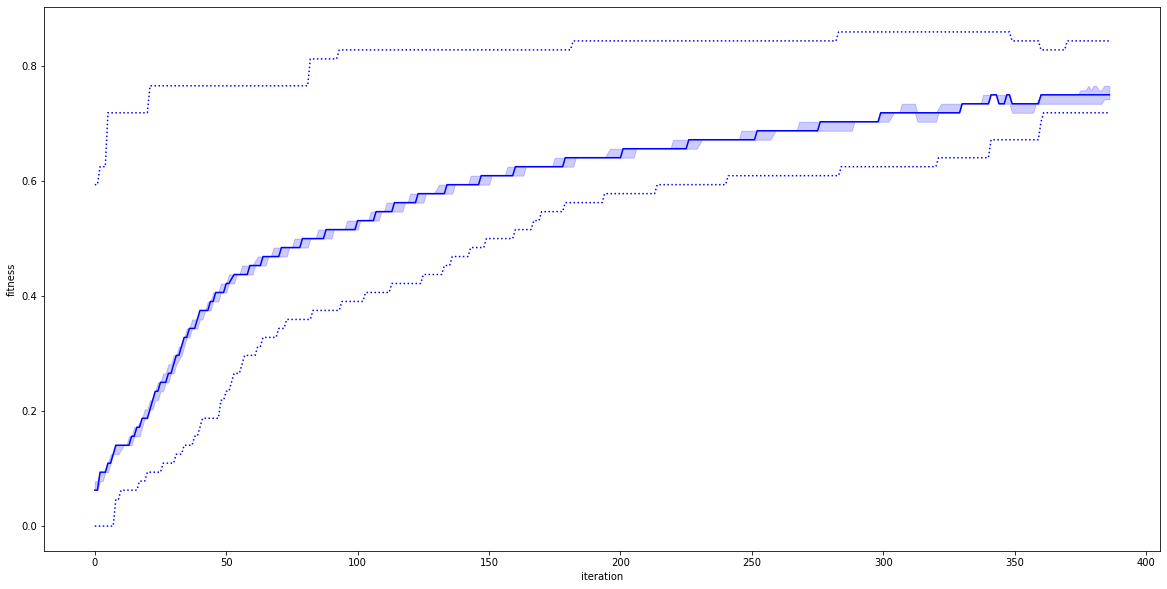

In [11]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=par_fit_data,x="iteration",y="fitness",estimator=np.median,color='b')
sns.lineplot(data=par_fit_data,x="iteration",y="fitness",linestyle=":",estimator=np.max,ci=None,color='b')
sns.lineplot(data=par_fit_data,x="iteration",y="fitness",linestyle=":",estimator=np.min,ci=None,color='b')



In [3]:
parent_descs = []
for folder in os.listdir(exp_folder):
    print(folder)
    parent_ids = df.load_parent_pool(exp_folder + "/" + folder + "/parents_pool.csv")
    descriptors = df.load_descriptor(exp_folder + "/" + folder + "/morph_features.csv")
    descs = [d +[folder] for d in descriptors]
    parent_descs += df.filter_to_parent_pool(descs,parent_ids)

par_desc_data = pd.DataFrame(data=parent_descs,columns=["iteration","robot index","width","depth","height","voxels","wheels","sensors","joints","casters","norm","replicate"])


meim_16_3_16-56-39-9868-18373300
meim_16_3_16-56-42-2870-2796053236
meim_16_3_16-56-45-5895-1777546940
meim_16_3_16-56-45-5917-957574002
meim_16_3_16-56-48-8931-985534567
meim_16_3_16-56-48-8936-2561894498
meim_16_3_16-56-51-1885-639115363
meim_16_3_17-8-55-5548-2215134775
meim_17_3_11-31-49-9733-2516969209
meim_17_3_11-37-2-2832-3966900741
[0, 26, 0.162182, 0.179999, 0.419636, 0.571751, 0.0625, 0.0, 0.0, 0.0, 0.7520654689732803, 'meim_16_3_16-56-39-9868-18373300']


/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x1440 with 0 Axes>

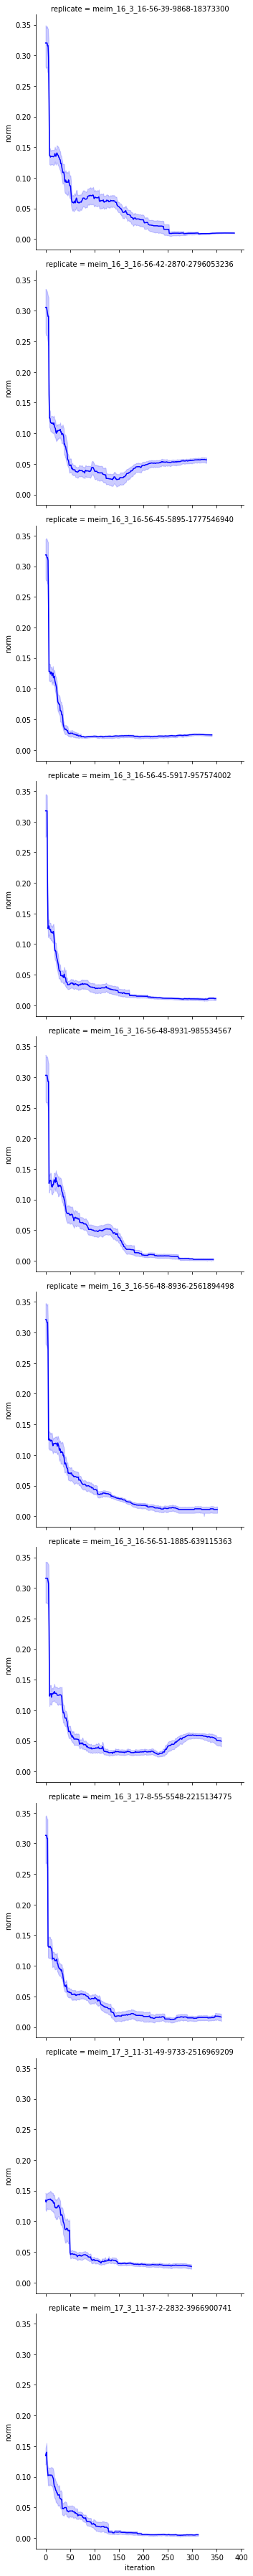

In [4]:
fig = plt.gcf()
fig.set_size_inches(40,20)
ax = sns.relplot(data=par_desc_data,kind="line",x="iteration",y="norm",estimator=np.std,color='b',row="replicate")

In [5]:
new_data_list = []
for rep in par_desc_data["replicate"].drop_duplicates():
    print(rep)
    tmp_data = par_desc_data.loc[par_desc_data["replicate"]==rep]
    for iter in tmp_data["iteration"].drop_duplicates():
        tmp_data2 = tmp_data.loc[tmp_data["iteration"] == iter]
        new_data = pd.DataFrame(tmp_data2.std(numeric_only=True)).transpose()
        new_data.reset_index()
        new_data["replicate"] = rep
        new_data["iteration"] = iter
        new_data_list.append(new_data)

std_data = pd.concat(new_data_list)


meim_16_3_16-56-39-9868-18373300
meim_16_3_16-56-42-2870-2796053236
meim_16_3_16-56-45-5895-1777546940
meim_16_3_16-56-45-5917-957574002
meim_16_3_16-56-48-8931-985534567
meim_16_3_16-56-48-8936-2561894498
meim_16_3_16-56-51-1885-639115363
meim_16_3_17-8-55-5548-2215134775
meim_17_3_11-31-49-9733-2516969209
meim_17_3_11-37-2-2832-3966900741


In [6]:
#std_data.reset_index()
std_data.index  = [i for i in range(len(std_data))]
print(std_data)

      iteration  robot index     width     depth        height        voxels  \
0             0    66.250558  0.126623  0.122700  1.544837e-01  2.335010e-01   
1             1    72.039054  0.126623  0.122700  1.544837e-01  2.335010e-01   
2             2    75.375967  0.126623  0.122700  1.544837e-01  2.335010e-01   
3             3    77.263746  0.126623  0.122700  1.544837e-01  2.335010e-01   
4             4    78.657197  0.125617  0.121392  1.539583e-01  2.335966e-01   
...         ...          ...       ...       ...           ...           ...   
3430        308  2757.253441  0.001279  0.002479  2.564324e-07  3.486925e-18   
3431        309  2752.907123  0.001279  0.002479  2.564324e-07  3.486925e-18   
3432        310  2743.226947  0.001279  0.002479  2.726599e-07  3.486925e-18   
3433        311  2746.152752  0.001279  0.002479  2.726599e-07  3.486925e-18   
3434        312  2759.037888  0.001279  0.002479  2.726599e-07  3.486925e-18   

        wheels  sensors    joints   cas

Text(0, 0.5, 'Morphological diversity')

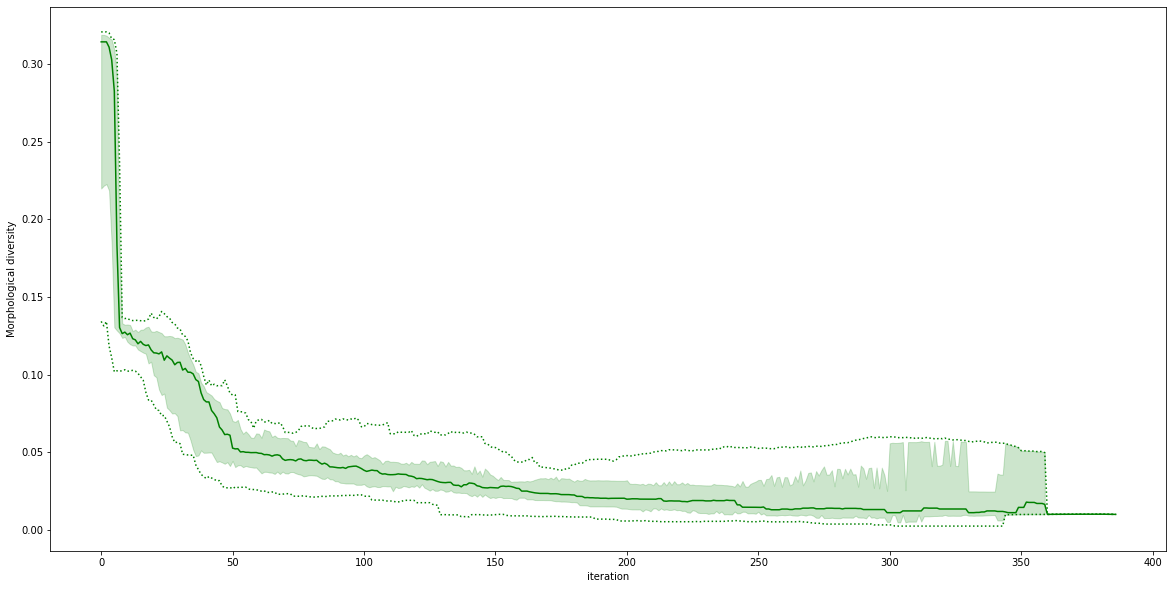

In [8]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=std_data,x="iteration",y="norm",estimator=np.median,color='g')
sns.lineplot(data=std_data,x="iteration",y="norm",linestyle=":",estimator=np.max,ci=None,color='g')
sns.lineplot(data=std_data,x="iteration",y="norm",linestyle=":",estimator=np.min,ci=None,color='g')
ax.set_ylabel("Morphological diversity")